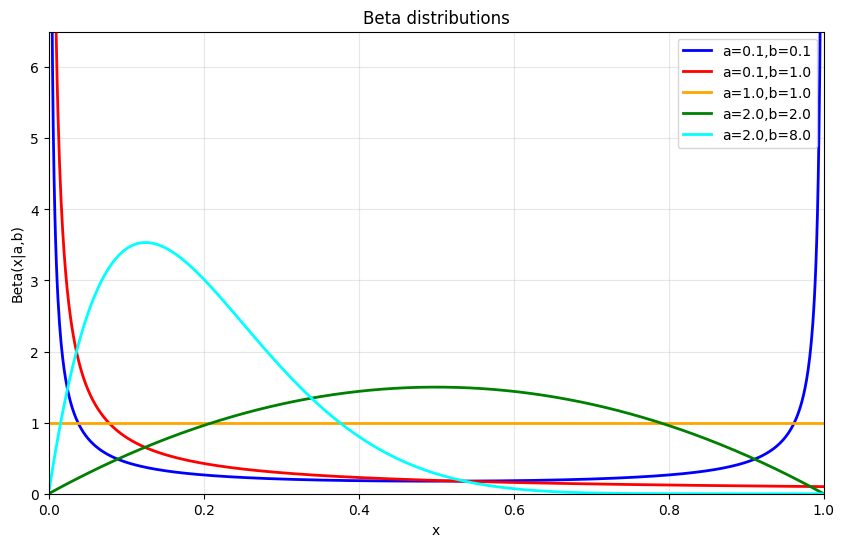

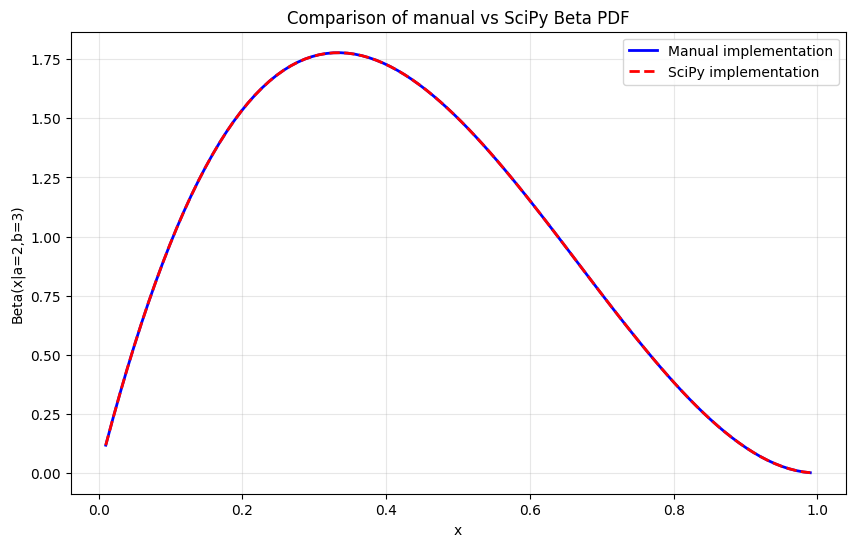

Beta Distribution Properties:
----------------------------------------
a=0.1,b=0.1:
  Mean: 0.5000
  Mode: Bimodal with spikes at 0 and 1
  Variance: 0.2083

a=0.1,b=1.0:
  Mean: 0.0909
  Mode: 0
  Variance: 0.0394

a=1.0,b=1.0:
  Mean: 0.5000
  Mode: Bimodal with spikes at 0 and 1
  Variance: 0.0833

a=2.0,b=2.0:
  Mean: 0.5000
  Mode: 0.5
  Variance: 0.0500

a=2.0,b=8.0:
  Mean: 0.2000
  Mode: 0.125
  Variance: 0.0145



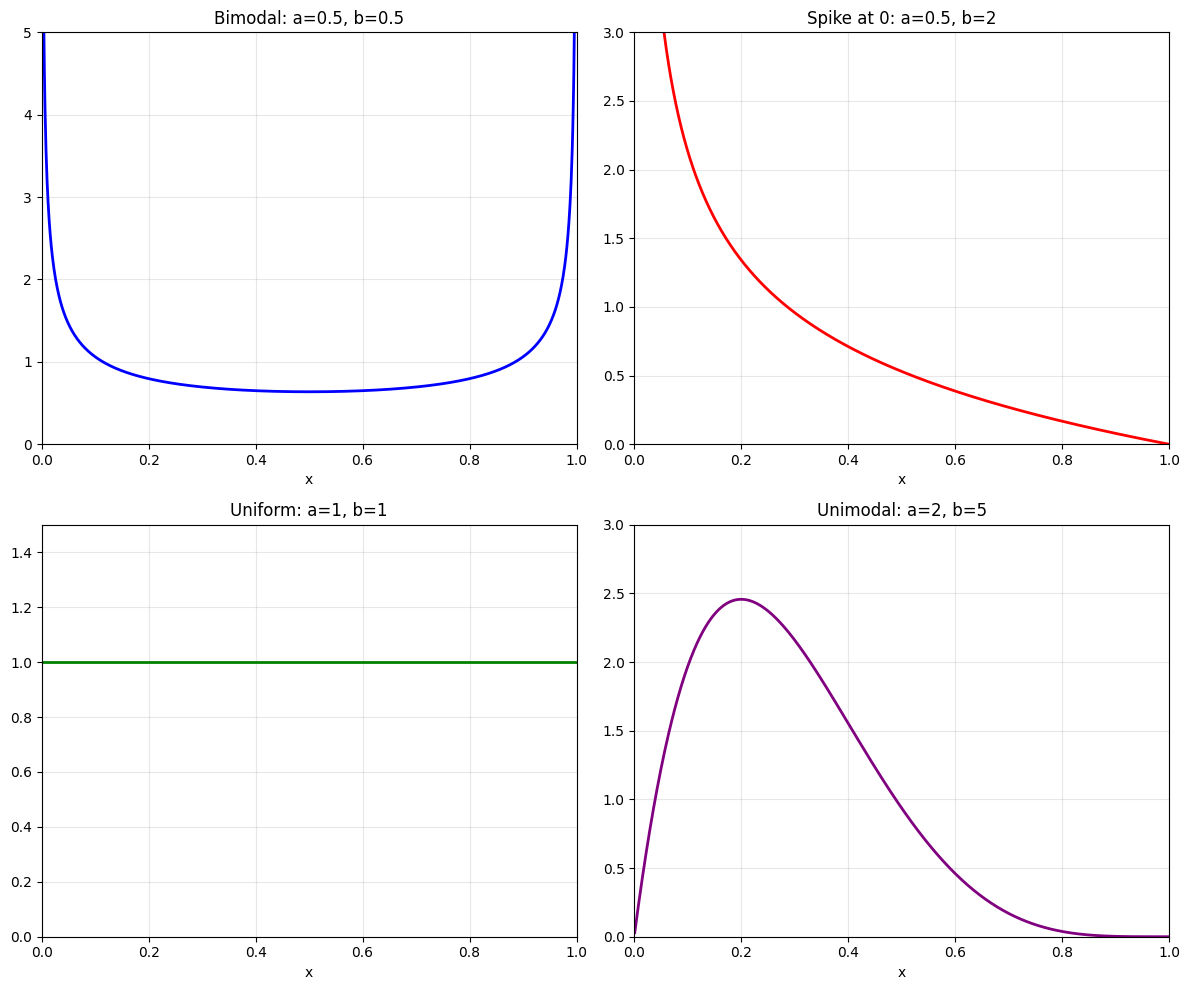

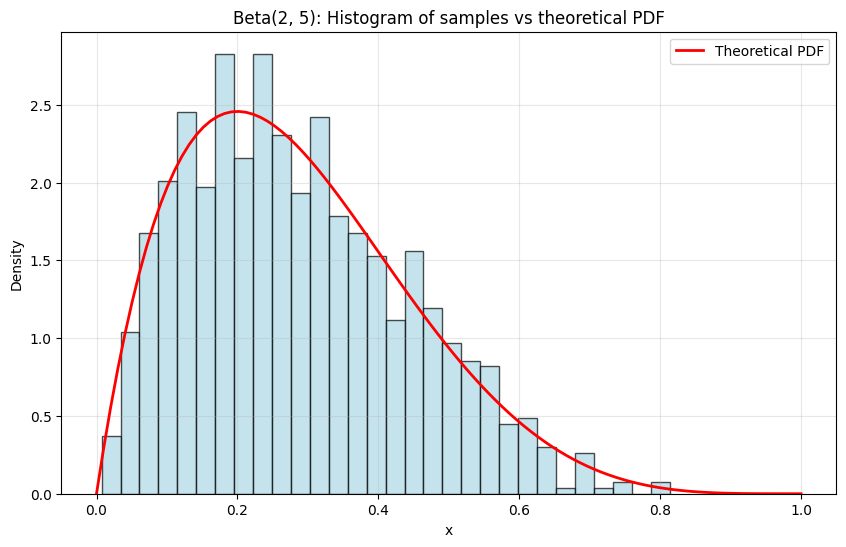

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import scipy.special as special

# Create data for plotting
x = np.linspace(0.001, 0.999, 1000)  # Avoid exact 0 and 1 for numerical stability

# Define different parameter combinations
params = [
    (0.1, 0.1, 'blue', '-', 'a=0.1,b=0.1'),
    (0.1, 1.0, 'red', '-', 'a=0.1,b=1.0'),
    (1.0, 1.0, 'orange', '-', 'a=1.0,b=1.0'),
    (2.0, 2.0, 'green', '-', 'a=2.0,b=2.0'),
    (2.0, 8.0, 'cyan', '-', 'a=2.0,b=8.0')
]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each Beta distribution
for a, b, color, style, label in params:
    # Using scipy.stats.beta for the PDF
    pdf_values = beta.pdf(x, a, b)
    plt.plot(x, pdf_values, color=color, linestyle=style, linewidth=2, label=label)

plt.xlim(0, 1)
plt.ylim(0, 6.5)
plt.xlabel('x')
plt.ylabel('Beta(x|a,b)')
plt.title('Beta distributions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Let's also show how to manually implement the Beta distribution
# using the formula from your textbook

def beta_function(a, b):
    """Beta function B(a,b) = Γ(a)Γ(b)/Γ(a+b)"""
    return special.gamma(a) * special.gamma(b) / special.gamma(a + b)

def beta_pdf(x, a, b):
    """Beta probability density function"""
    # Beta(x|a,b) = (1/B(a,b)) * x^(a-1) * (1-x)^(b-1)
    return (1 / beta_function(a, b)) * (x**(a-1)) * ((1-x)**(b-1))

# Compare manual implementation with scipy
a, b = 2.0, 3.0
x_test = np.linspace(0.01, 0.99, 100)

manual_pdf = [beta_pdf(xi, a, b) for xi in x_test]
scipy_pdf = beta.pdf(x_test, a, b)

plt.figure(figsize=(10, 6))
plt.plot(x_test, manual_pdf, 'b-', label='Manual implementation', linewidth=2)
plt.plot(x_test, scipy_pdf, 'r--', label='SciPy implementation', linewidth=2)
plt.xlabel('x')
plt.ylabel('Beta(x|a=2,b=3)')
plt.title('Comparison of manual vs SciPy Beta PDF')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Properties of the Beta distribution
def beta_properties(a, b):
    """Calculate mean, mode, and variance of Beta distribution"""
    mean = a / (a + b)
    
    # Mode exists only when a > 1 and b > 1
    if a > 1 and b > 1:
        mode = (a - 1) / (a + b - 2)
    elif a < 1 and b >= 1:
        mode = 0
    elif a >= 1 and b < 1:
        mode = 1
    else:  # a < 1 and b < 1
        mode = "Bimodal with spikes at 0 and 1"
    
    variance = (a * b) / ((a + b)**2 * (a + b + 1))
    
    return mean, mode, variance

# Show properties for different parameter combinations
print("Beta Distribution Properties:")
print("-" * 40)
for a, b, _, _, label in params:
    mean, mode, var = beta_properties(a, b)
    print(f"{label}:")
    print(f"  Mean: {mean:.4f}")
    print(f"  Mode: {mode}")
    print(f"  Variance: {var:.4f}")
    print()

# Demonstrate bimodal vs unimodal behavior
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
x = np.linspace(0.001, 0.999, 1000)

# Bimodal (a < 1, b < 1)
ax1 = axes[0, 0]
ax1.plot(x, beta.pdf(x, 0.5, 0.5), 'b-', linewidth=2)
ax1.set_title('Bimodal: a=0.5, b=0.5')
ax1.set_ylim(0, 5)

# Spike at 0 (a < 1, b >= 1)
ax2 = axes[0, 1]
ax2.plot(x, beta.pdf(x, 0.5, 2), 'r-', linewidth=2)
ax2.set_title('Spike at 0: a=0.5, b=2')
ax2.set_ylim(0, 3)

# Uniform (a = 1, b = 1)
ax3 = axes[1, 0]
ax3.plot(x, beta.pdf(x, 1, 1), 'g-', linewidth=2)
ax3.set_title('Uniform: a=1, b=1')
ax3.set_ylim(0, 1.5)

# Unimodal (a > 1, b > 1)
ax4 = axes[1, 1]
ax4.plot(x, beta.pdf(x, 2, 5), 'purple', linewidth=2)
ax4.set_title('Unimodal: a=2, b=5')
ax4.set_ylim(0, 3)

for ax in axes.flat:
    ax.set_xlim(0, 1)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x')

plt.tight_layout()
plt.show()

# Generate random samples from Beta distribution
np.random.seed(42)
samples = beta.rvs(a=2, b=5, size=1000)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.7, color='lightblue', edgecolor='black')
x_theory = np.linspace(0, 1, 100)
plt.plot(x_theory, beta.pdf(x_theory, 2, 5), 'r-', linewidth=2, label='Theoretical PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Beta(2, 5): Histogram of samples vs theoretical PDF')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

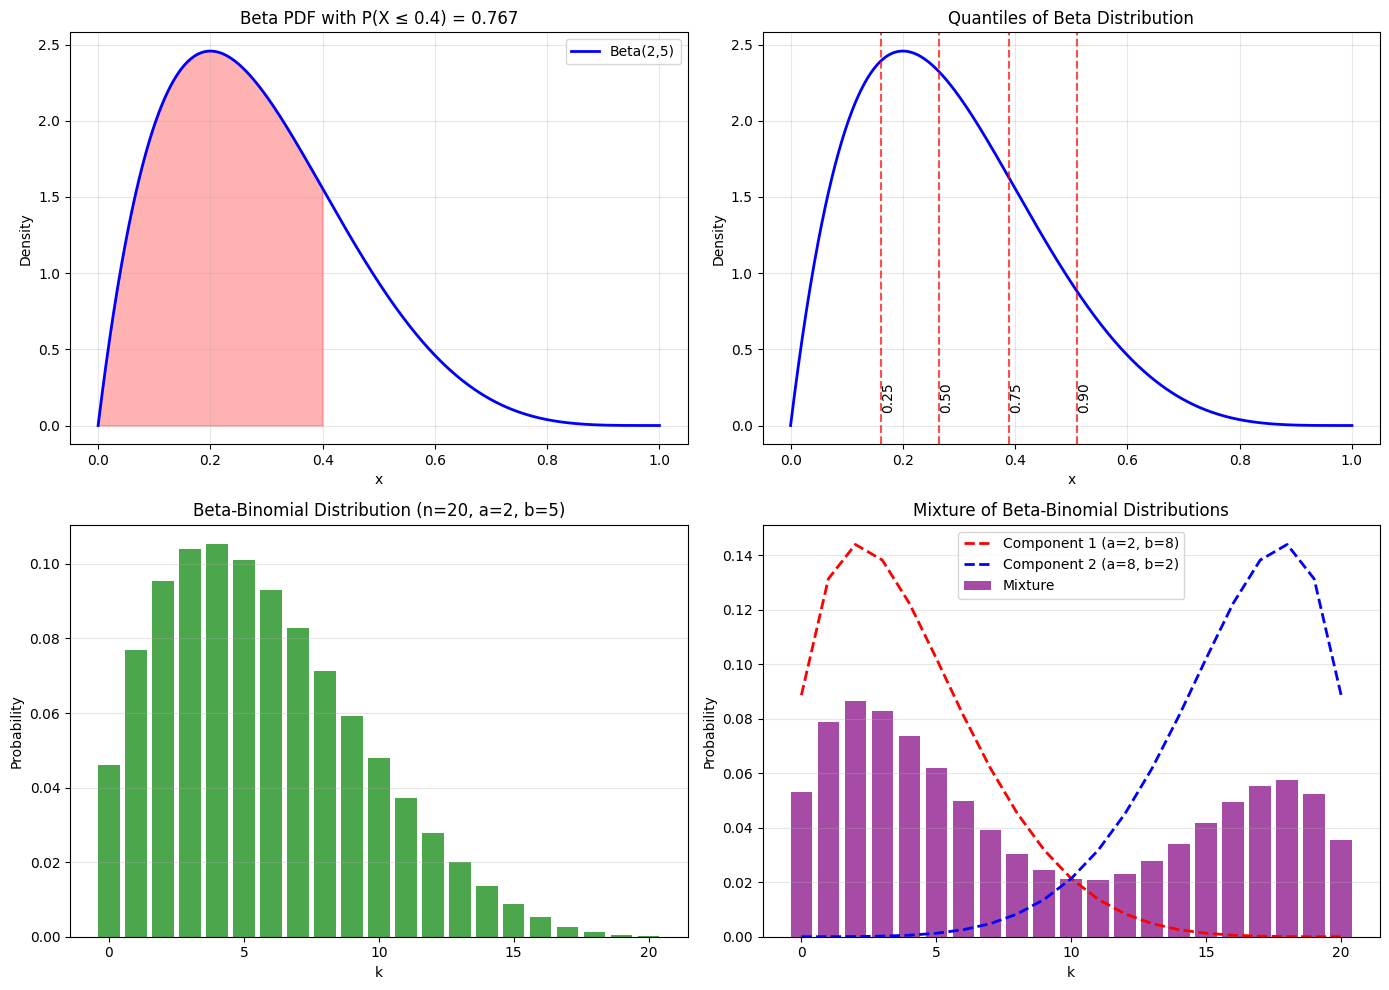

Beta-Binomial Threshold Analysis
----------------------------------------
Target probability: 0.25
Threshold k: 3
Actual P(X ≤ 3): 0.3224

Target probability: 0.50
Threshold k: 5
Actual P(X ≤ 5): 0.5286

Target probability: 0.75
Threshold k: 8
Actual P(X ≤ 8): 0.7755

Target probability: 0.90
Threshold k: 11
Actual P(X ≤ 11): 0.9199

Target probability: 0.95
Threshold k: 13
Actual P(X ≤ 13): 0.9679


Verifying Beta-Binomial = Integrated Binomial
--------------------------------------------------
k=0: Beta-Binomial=0.035714, Integrated=0.035714, Diff=0.00e+00
k=2: Beta-Binomial=0.123626, Integrated=0.123626, Diff=5.55e-17
k=4: Beta-Binomial=0.157343, Integrated=0.157343, Diff=8.33e-17
k=6: Beta-Binomial=0.122378, Integrated=0.122378, Diff=2.78e-17
k=8: Beta-Binomial=0.056194, Integrated=0.056194, Diff=4.16e-17
k=10: Beta-Binomial=0.008242, Integrated=0.008242, Diff=5.20e-18


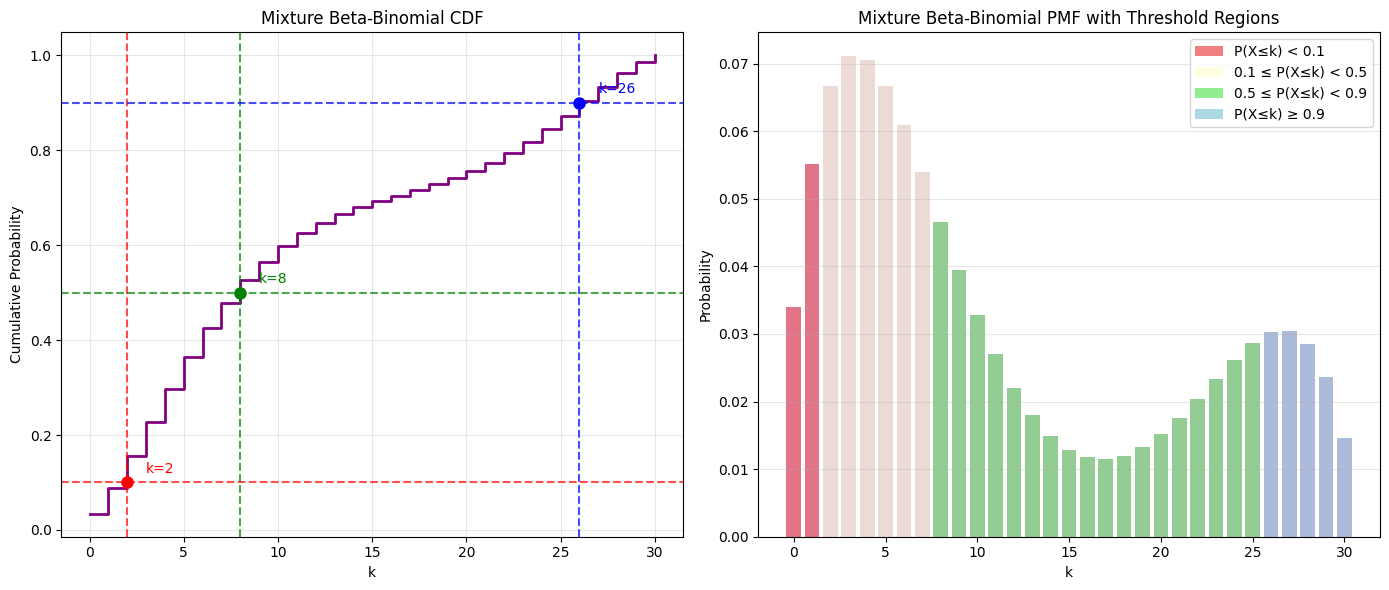


Beta-Binomial Confidence Intervals
----------------------------------------

Parameters: a=2, b=8
Mean: 10.00
90% CI: [1, 23]
95% CI: [1, 25]
99% CI: [0, 31]

Parameters: a=5, b=5
Mean: 25.00
90% CI: [11, 39]
95% CI: [9, 41]
99% CI: [6, 44]

Parameters: a=8, b=2
Mean: 40.00
90% CI: [27, 49]
95% CI: [25, 49]
99% CI: [19, 50]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, betabinom, binom
from scipy.integrate import quad
from scipy.optimize import brentq
import warnings
warnings.filterwarnings('ignore')

# 1. Beta Distribution Integration
def beta_cdf_manual(x, a, b):
    """Manual computation of Beta CDF using integration"""
    integral, _ = quad(lambda t: beta.pdf(t, a, b), 0, x)
    return integral

# Find where Beta CDF exceeds a certain value
def find_beta_threshold(a, b, target_prob):
    """Find x where P(X ≤ x) = target_prob for Beta(a,b)"""
    # Use brentq to find the root of F(x) - target_prob = 0
    return brentq(lambda x: beta.cdf(x, a, b) - target_prob, 0.001, 0.999)

# Visualize Beta integration
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Beta PDF and shaded area
ax1 = axes[0, 0]
a, b = 2, 5
x = np.linspace(0, 1, 1000)
threshold = 0.4
y = beta.pdf(x, a, b)

ax1.plot(x, y, 'b-', linewidth=2, label=f'Beta({a},{b})')
ax1.fill_between(x[x <= threshold], y[x <= threshold], alpha=0.3, color='red')
area = beta.cdf(threshold, a, b)
ax1.set_title(f'Beta PDF with P(X ≤ {threshold}) = {area:.3f}')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Finding where integral exceeds value
ax2 = axes[0, 1]
target_probs = [0.25, 0.5, 0.75, 0.9]
thresholds = [find_beta_threshold(a, b, p) for p in target_probs]

ax2.plot(x, y, 'b-', linewidth=2)
for prob, thresh in zip(target_probs, thresholds):
    ax2.axvline(thresh, color='red', linestyle='--', alpha=0.7)
    ax2.text(thresh, 0.1, f'{prob:.2f}', rotation=90)

ax2.set_title('Quantiles of Beta Distribution')
ax2.set_xlabel('x')
ax2.set_ylabel('Density')
ax2.grid(True, alpha=0.3)

# 2. Beta-Binomial Distribution
def beta_binomial_pmf(k, n, a, b):
    """Beta-Binomial PMF"""
    return betabinom.pmf(k, n, a, b)

# Plot Beta-Binomial
ax3 = axes[1, 0]
n = 20
a, b = 2, 5
k_values = np.arange(0, n+1)
pmf_values = [beta_binomial_pmf(k, n, a, b) for k in k_values]

ax3.bar(k_values, pmf_values, alpha=0.7, color='green')
ax3.set_title(f'Beta-Binomial Distribution (n={n}, a={a}, b={b})')
ax3.set_xlabel('k')
ax3.set_ylabel('Probability')
ax3.grid(True, alpha=0.3, axis='y')

# 3. Mixture of Beta-Binomial
def mixture_beta_binomial_pmf(k, n, params_list, weights):
    """Mixture of Beta-Binomial distributions"""
    pmf = 0
    for (a, b), w in zip(params_list, weights):
        pmf += w * betabinom.pmf(k, n, a, b)
    return pmf

# Plot mixture
ax4 = axes[1, 1]
params_list = [(2, 8), (8, 2)]  # Two different Beta-Binomial components
weights = [0.6, 0.4]  # Mixture weights

mixture_pmf = [mixture_beta_binomial_pmf(k, n, params_list, weights) for k in k_values]
component1_pmf = [betabinom.pmf(k, n, params_list[0][0], params_list[0][1]) for k in k_values]
component2_pmf = [betabinom.pmf(k, n, params_list[1][0], params_list[1][1]) for k in k_values]

ax4.bar(k_values, mixture_pmf, alpha=0.7, color='purple', label='Mixture')
ax4.plot(k_values, component1_pmf, 'r--', linewidth=2, label=f'Component 1 (a={params_list[0][0]}, b={params_list[0][1]})')
ax4.plot(k_values, component2_pmf, 'b--', linewidth=2, label=f'Component 2 (a={params_list[1][0]}, b={params_list[1][1]})')
ax4.set_title('Mixture of Beta-Binomial Distributions')
ax4.set_xlabel('k')
ax4.set_ylabel('Probability')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 4. Finding where cumulative probability exceeds threshold
def find_beta_binomial_threshold(n, a, b, target_prob):
    """Find k where P(X ≤ k) ≥ target_prob for Beta-Binomial"""
    cdf = 0
    for k in range(n+1):
        cdf += betabinom.pmf(k, n, a, b)
        if cdf >= target_prob:
            return k, cdf
    return n, cdf

# Demonstrate finding thresholds
print("Beta-Binomial Threshold Analysis")
print("-" * 40)
n = 20
a, b = 2, 5
target_probs = [0.25, 0.5, 0.75, 0.9, 0.95]

for target in target_probs:
    k_thresh, actual_prob = find_beta_binomial_threshold(n, a, b, target)
    print(f"Target probability: {target:.2f}")
    print(f"Threshold k: {k_thresh}")
    print(f"Actual P(X ≤ {k_thresh}): {actual_prob:.4f}")
    print()

# 5. Integration comparison: Beta vs Binomial with integrated parameter
def compare_beta_binomial_to_integrated_binomial(n, a, b, k):
    """Compare Beta-Binomial to integrated Binomial"""
    # Beta-Binomial probability
    bb_prob = betabinom.pmf(k, n, a, b)
    
    # Integrated Binomial: ∫ Binomial(k|n,p) * Beta(p|a,b) dp
    def integrand(p):
        return binom.pmf(k, n, p) * beta.pdf(p, a, b)
    
    integrated_prob, _ = quad(integrand, 0, 1)
    
    return bb_prob, integrated_prob

# Verify they are the same
print("\nVerifying Beta-Binomial = Integrated Binomial")
print("-" * 50)
n, a, b = 10, 3, 4
for k in range(0, n+1, 2):
    bb_prob, int_prob = compare_beta_binomial_to_integrated_binomial(n, a, b, k)
    print(f"k={k}: Beta-Binomial={bb_prob:.6f}, Integrated={int_prob:.6f}, Diff={abs(bb_prob-int_prob):.2e}")

# 6. Advanced: Finding regions where mixture exceeds threshold
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot mixture CDF
n = 30
params_list = [(2, 8), (8, 2)]
weights = [0.7, 0.3]

k_values = np.arange(0, n+1)
mixture_pmf = [mixture_beta_binomial_pmf(k, n, params_list, weights) for k in k_values]
mixture_cdf = np.cumsum(mixture_pmf)

ax1.step(k_values, mixture_cdf, where='post', linewidth=2, color='purple')
ax1.set_title('Mixture Beta-Binomial CDF')
ax1.set_xlabel('k')
ax1.set_ylabel('Cumulative Probability')
ax1.grid(True, alpha=0.3)

# Highlight where CDF exceeds thresholds
thresholds = [0.1, 0.5, 0.9]
colors = ['red', 'green', 'blue']
for thresh, color in zip(thresholds, colors):
    k_thresh = np.argmax(mixture_cdf >= thresh)
    ax1.axhline(thresh, color=color, linestyle='--', alpha=0.7)
    ax1.axvline(k_thresh, color=color, linestyle='--', alpha=0.7)
    ax1.plot(k_thresh, thresh, 'o', color=color, markersize=8)
    ax1.text(k_thresh+1, thresh+0.02, f'k={k_thresh}', color=color)

# Plot density and show regions
ax2.bar(k_values, mixture_pmf, alpha=0.7, color='purple')
ax2.set_title('Mixture Beta-Binomial PMF with Threshold Regions')
ax2.set_xlabel('k')
ax2.set_ylabel('Probability')

# Color code regions based on cumulative probability
for i, (k, cdf_val) in enumerate(zip(k_values, mixture_cdf)):
    if cdf_val < 0.1:
        color = 'lightcoral'
    elif cdf_val < 0.5:
        color = 'lightyellow'
    elif cdf_val < 0.9:
        color = 'lightgreen'
    else:
        color = 'lightblue'
    ax2.bar(k, mixture_pmf[i], color=color, alpha=0.8)

ax2.grid(True, alpha=0.3, axis='y')

# Add legend for regions
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightcoral', label='P(X≤k) < 0.1'),
    Patch(facecolor='lightyellow', label='0.1 ≤ P(X≤k) < 0.5'),
    Patch(facecolor='lightgreen', label='0.5 ≤ P(X≤k) < 0.9'),
    Patch(facecolor='lightblue', label='P(X≤k) ≥ 0.9')
]
ax2.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# 7. Finding confidence intervals for Beta-Binomial
def beta_binomial_ci(n, a, b, confidence=0.95):
    """Find confidence interval for Beta-Binomial"""
    alpha = 1 - confidence
    lower_quantile = alpha / 2
    upper_quantile = 1 - alpha / 2
    
    # Find lower bound
    cdf = 0
    for k in range(n+1):
        cdf += betabinom.pmf(k, n, a, b)
        if cdf >= lower_quantile:
            lower_bound = k
            break
    
    # Find upper bound
    cdf = 0
    for k in range(n+1):
        cdf += betabinom.pmf(k, n, a, b)
        if cdf >= upper_quantile:
            upper_bound = k
            break
    
    return lower_bound, upper_bound

# Example of confidence intervals
print("\nBeta-Binomial Confidence Intervals")
print("-" * 40)
n = 50
params = [(2, 8), (5, 5), (8, 2)]
confidences = [0.90, 0.95, 0.99]

for a, b in params:
    print(f"\nParameters: a={a}, b={b}")
    mean = n * a / (a + b)
    print(f"Mean: {mean:.2f}")
    for conf in confidences:
        lower, upper = beta_binomial_ci(n, a, b, conf)
        print(f"{int(conf*100)}% CI: [{lower}, {upper}]")